Imports and load data

In [32]:
import numpy as np
import pandas as pd
import pygal

Save both CSV in different variables

In [33]:
df = pd.read_csv('C:/Users/rajhr/Downloads/chinese debt trap all over the world. - projects.csv')
df2 = pd.read_csv("C:/Users/rajhr/Downloads/chinese debt trap in Africa (sector wise).csv")

Analyze the data

In [34]:
df.head()

,Expand All | Collapse All,YEAR,AMOUNT,LENDER,BORROWER,SECTOR,SENSITIVE TERRITORY OVERLAP,Country
0,"“Lar Patriota"" Infrastructure (Phase 1)",2011,$50M,CDB,Government,Transport,None Known,Angola
1,"10-Year Oil Supply Plan (10Mt/Year), ""Oil for ...",2009,$7.0B,CDB,Petrobras,"Extraction, pipelines",None Known,Brazil
2,1000 housing project,2012,$47M,ExImBank,Government,Government,None Known,Suriname
3,115kV Transmission Line and Substation from Ph...,2009,$475M,ExImBank,Electricite Du Cambodge,Power,None Known,Cambodia
4,151 Multisector infrastructure projects,2016,$600M,CDB,Central Bank of Kenya,Mulit-sector/discretionary,None Known,Kenya


In [35]:
df2.head()

,S.no,Project,Year,Lender,$ Allocation,Country,Invested On
0,1,"Luanda Railway Phase I Rehabilitation, 444km (...",2002,CHEXIM,$90M,Angola,Transportation
1,2,"Kipsigak-Serem-Shamakhokho Road, 54km, Loan 2",2001,CIDCA,$6M,Kenya,Transportation
2,3,"Addis-Adama Expressway Phase I, 80km",2009,CHEXIM,$349M,Ethiopia,Transportation
3,4,"Railway Modernisation Project 1 (Idu-Kaduna), ...",2010,CHEXIM,$500M,Nigeria,Transportation
4,5,Special Train Loan - TAZARA,2001,CIDCA,$6M,Zambia,Transportation


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Expand All | Collapse All    858 non-null    object
 1   YEAR                         858 non-null    int64 
 2   AMOUNT                       858 non-null    object
 3   LENDER                       858 non-null    object
 4   BORROWER                     857 non-null    object
 5   SECTOR                       858 non-null    object
 6   SENSITIVE TERRITORY OVERLAP  858 non-null    object
 7   Country                      858 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.8+ KB


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   S.no          1188 non-null   int64 
 1   Project       1188 non-null   object
 2   Year          1188 non-null   int64 
 3   Lender        1188 non-null   object
 4   $ Allocation  1188 non-null   object
 5   Country       1188 non-null   object
 6   Invested On   1188 non-null   object
dtypes: int64(2), object(5)
memory usage: 65.1+ KB


Total money spent in other countries by China in respective years

In [38]:
perYear = df[["YEAR" ,"AMOUNT"]]
perYear2 = df2[["Year", "$ Allocation"]]

In [39]:
perYear.head()

,YEAR,AMOUNT
0,2011,$50M
1,2009,$7.0B
2,2012,$47M
3,2009,$475M
4,2016,$600M


In [40]:
perYear2.head()

,Year,$ Allocation
0,2002,$90M
1,2001,$6M
2,2009,$349M
3,2010,$500M
4,2001,$6M


In [41]:
#I decided to convert the columns to Numpy arrays to better treat the data
npAmount = np.array(perYear['AMOUNT'])
npAllocation = np.array(perYear2['$ Allocation'])

In [43]:
#To convert 'Amount' to INT we need to clean the data
#I made a for loop to iterate over the list created previously and replace the letters and symbols with 0's if needed (Everything is converted to Millions)

lista = []

for i in npAmount:
    if i[-1] == 'B':
        i = i[:-1]
        i = i.replace('.','')
        i = i + '000'
        i = i[1:]
        lista.append(i)
    else:
        i = i[:-1]
        i = i[1:]
        lista.append(i)
intAmount = [int(x) for x in lista]

#Here are the first 5 examples of the result

print(npAmount[:5])
print(intAmount[:5])

['$50M' '$7.0B' '$47M' '$475M' '$600M']
[50, 70000, 47, 475, 600]


In [44]:
#Also need to convert YEAR from object to INT

npYear = np.array(df['YEAR'])
list = []
for i in npYear:
    list.append(i)

intYear = [int(x) for x in npYear]

print(intYear)

[2011, 2009, 2012, 2009, 2016, 2015, 2015, 2017, 2018, 2018, 2017, 2017, 2016, 2015, 2014, 2015, 2011, 2008, 2017, 2012, 2012, 2014, 2014, 2016, 2012, 2012, 2018, 2017, 2010, 2010, 2013, 2011, 2016, 2017, 2011, 2016, 2009, 2013, 2013, 2013, 2013, 2013, 2009, 2016, 2015, 2017, 2009, 2013, 2009, 2012, 2009, 2018, 2010, 2013, 2009, 2009, 2013, 2015, 2011, 2013, 2015, 2017, 2010, 2015, 2017, 2008, 2016, 2017, 2011, 2011, 2010, 2015, 2010, 2015, 2009, 2016, 2017, 2018, 2011, 2014, 2014, 2017, 2016, 2016, 2008, 2010, 2011, 2014, 2016, 2009, 2012, 2013, 2012, 2009, 2010, 2013, 2016, 2016, 2015, 2018, 2008, 2014, 2013, 2017, 2018, 2012, 2012, 2016, 2009, 2009, 2015, 2016, 2016, 2016, 2017, 2017, 2017, 2016, 2017, 2016, 2016, 2012, 2013, 2011, 2011, 2012, 2014, 2012, 2017, 2011, 2011, 2011, 2012, 2009, 2012, 2011, 2018, 2011, 2012, 2017, 2011, 2013, 2016, 2012, 2016, 2012, 2011, 2013, 2013, 2014, 2016, 2015, 2014, 2010, 2009, 2008, 2017, 2010, 2014, 2018, 2015, 2012, 2016, 2014, 2009, 2011, 201

In [45]:
#Create a new dataframe containing the list created before
data = {'YEAR': intYear,
        'AMOUNT': intAmount}

perYearClean = pd.DataFrame(data)
perYearClean

,YEAR,AMOUNT
0,2011,50
1,2009,70000
2,2012,47
3,2009,475
4,2016,600
...,...,...
853,2009,120
854,2010,73
855,2009,217
856,2011,367


In [46]:
#Combine the repeated Year values and sum them to calculate the total spent every year

perYearGrouped = perYearClean.groupby("YEAR").agg(sum)
perYearGrouped

,AMOUNT
YEAR,
2008,19265
2009,524600
2010,339135
2011,194149
2012,195986
2013,218252
2014,350791
2015,366104
2016,555601


In [47]:
#We repeat the procedure with the other CSV file

perYear2.head()

,Year,$ Allocation
0,2002,$90M
1,2001,$6M
2,2009,$349M
3,2010,$500M
4,2001,$6M


In [48]:
npYear2 = np.array(df2['Year'])

intYear2 = [int(x) for x in npYear2]

print(intYear2)

[2002, 2001, 2009, 2010, 2001, 2006, 2011, 2015, 2007, 2012, 2019, 2015, 2011, 2003, 2008, 2003, 2013, 2014, 2003, 2018, 2009, 2014, 2009, 2017, 2005, 2009, 2001, 2004, 2011, 2013, 2010, 2005, 2018, 2018, 2009, 2004, 2003, 2017, 2015, 2008, 2004, 2002, 2016, 2007, 2001, 2008, 2000, 2014, 2013, 2004, 2003, 2006, 2010, 2002, 2012, 2006, 2003, 2009, 2017, 2011, 2014, 2008, 2007, 2020, 2013, 2013, 2012, 2014, 2020, 2013, 2013, 2016, 2011, 2011, 2004, 2011, 2012, 2011, 2017, 2001, 2002, 2006, 2002, 2007, 2005, 2005, 2006, 2006, 2006, 2010, 2010, 2006, 2000, 2005, 2008, 2011, 2007, 2018, 2019, 2005, 2004, 2010, 2007, 2001, 2007, 2013, 2007, 2014, 2006, 2005, 2008, 2020, 2004, 2010, 2003, 2018, 2016, 2006, 2010, 2002, 2008, 2005, 2007, 2003, 2016, 2012, 2018, 2009, 2011, 2013, 2011, 2009, 2017, 2012, 2000, 2017, 2016, 2012, 2016, 2002, 2002, 2007, 2003, 2007, 2006, 2018, 2011, 2009, 2009, 2009, 2010, 2008, 2006, 2000, 2007, 2015, 2017, 2002, 2007, 2005, 2001, 2012, 2002, 2012, 2018, 2003, 200

In [49]:
lista2 = []

for i in npAllocation:
    if i[-1] == 'B':
        i = i[:-1]
        i = i.replace('.','')
        i = i + '000'
        i = i[1:]
        lista2.append(i)
    else:
        i = i[:-1]
        i = i[1:]
        i = i.replace(',','')
        lista2.append(i)

for i in range(len(lista2)):
    intAllocation = [int(x) for x in lista2]

print(intAllocation)

[90, 6, 349, 500, 6, 565, 423, 11000, 50, 115, 739, 689, 100, 22, 24, 16, 134, 12, 41, 375, 99, 158, 293, 105, 12, 36, 11, 5, 248, 132, 157, 31, 98, 87, 80, 5, 24, 50, 15, 11, 8, 15, 500, 116, 128, 316, 6, 483, 500, 2, 22, 21, 51, 115, 920, 257, 238, 825, 459, 367, 305, 318, 51, 214, 145, 139, 130, 100, 79, 76, 25, 20, 18, 6, 3, 20000, 223, 103, 68, 1, 1, 19000, 78, 48, 8, 60, 30, 63, 25, 21, 48, 50, 10, 33, 77, 44, 25, 200, 77, 59, 42, 32, 4, 2, 31, 103, 30, 15, 17, 60, 30, 49, 17, 17, 12, 25, 23, 21, 10, 6, 4, 40, 25, 10, 128, 97, 389, 132, 96, 322, 260, 259, 201, 144, 18, 93, 79, 50, 10, 6, 4, 1, 11, 380, 45, 255, 8, 92, 68, 28, 61, 70, 61, 2, 53, 10, 43, 12, 17, 1, 16, 15, 9, 8, 8, 4, 73, 600, 100, 7, 10, 5, 1, 96, 352, 170, 48, 97, 18, 60, 24, 23, 13, 16, 14, 9, 8, 1, 56, 4, 333, 285, 150, 106, 16, 9, 25000, 4, 57, 11, 37, 20, 30, 8, 32, 32, 15, 7, 2, 200, 50, 25, 30, 78, 3, 6, 4, 3, 4, 4, 8, 5, 2, 12, 3, 7, 1, 12, 2, 6, 4, 16, 10, 4, 4, 5, 6, 2, 3, 2, 3, 2, 8, 3, 6, 6, 4, 4, 3, 3

In [50]:
data2 = {'YEAR': intYear2,
        'AMOUNT': intAllocation}

perYearClean2 = pd.DataFrame(data2)
perYearClean2.head()

,YEAR,AMOUNT
0,2002,90
1,2001,6
2,2009,349
3,2010,500
4,2001,6


In [51]:
perYearGrouped2 = perYearClean2.groupby("YEAR").agg(sum)
perYearGrouped2

,AMOUNT
YEAR,
2000,139
2001,309
2002,751
2003,1755
2004,964
2005,2248
2006,22335
2007,4021
2008,3398


Append dataframes

In [52]:
#Combine both cleaned dataframes to get the total money spent each year

perYearCombined = pd.concat([perYearGrouped, perYearGrouped2])

perYearCombined["AMOUNT"] = perYearCombined["AMOUNT"].astype(int)
perYearCombinedFinal = perYearCombined.groupby(["YEAR"]).sum()

perYearCombinedFinal

,AMOUNT
YEAR,
2000,139
2001,309
2002,751
2003,1755
2004,964
2005,2248
2006,22335
2007,4021
2008,22663


Plot the results

<AxesSubplot:xlabel='YEAR'>

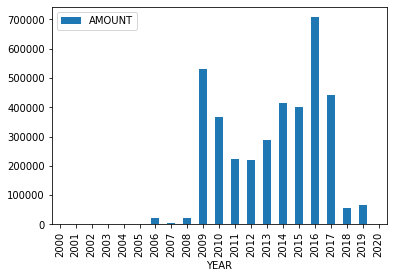

In [53]:
#Simple Panda plot

perYearCombinedFinal.plot(kind = 'bar')

Money invested by China in other countries

In [54]:
#Select the columns to use in the new dataframe

datos = [df['Country'], perYearClean['AMOUNT']]
headers = ["COUNTRY", "AMOUNT"]
perCountry = pd.concat(datos, axis=1, keys=headers)
perCountry.head()

,COUNTRY,AMOUNT
0,Angola,50
1,Brazil,70000
2,Suriname,47
3,Cambodia,475
4,Kenya,600


In [55]:
#Add repeated values to calculate the total for each country

perCountryGrouped = perCountry.groupby("COUNTRY").agg(sum)
perCountryGrouped.head()

,AMOUNT
COUNTRY,
Angola,197940
Antigua & Barbuda,128
Argentina,158383
Bahamas,99
Bangladesh,67789


In [56]:
#Do the same with the other CSV file

datos2 = [df2['Country'], perYearClean2['AMOUNT']]
headers2 = ["COUNTRY", "AMOUNT"]
perCountry2 = pd.concat(datos2, axis=1, keys=headers)
perCountry2.head()

,COUNTRY,AMOUNT
0,Angola,90
1,Kenya,6
2,Ethiopia,349
3,Nigeria,500
4,Zambia,6


In [57]:
perCountryGrouped2 = perCountry2.groupby("COUNTRY").agg(sum)
perCountryGrouped2.head()

,AMOUNT
COUNTRY,
Algeria,9
Angola,275747
Benin,536
Botswana,951
Burkina Faso,157


Append dataframes

In [58]:
perCountryCombined = pd.concat([perCountryGrouped, perCountryGrouped2])
perCountryCombined["AMOUNT"] = perCountryCombined["AMOUNT"].astype(int)
perCountryCombinedFinal = perCountryCombined.groupby(["COUNTRY"]).sum()

perCountryCombinedFinal

,AMOUNT
COUNTRY,
Algeria,9
Angola,473687
Antigua & Barbuda,128
Argentina,158383
Bahamas,99
...,...
Vanuatu,636
Venezuela,554091
Vietnam,57313


Plot the results

<AxesSubplot:xlabel='COUNTRY'>

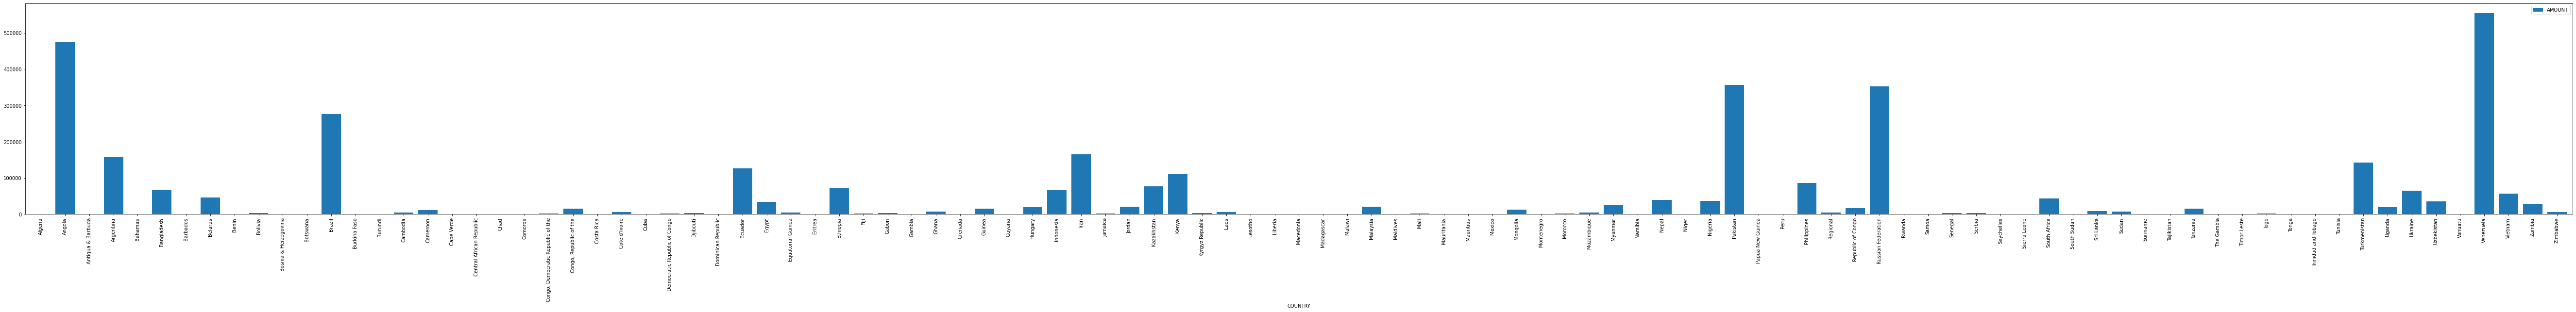

In [59]:
perCountryCombinedFinal.plot(kind = 'bar', width=0.8, figsize=(94,8))

China Debt Trap in World Map

In [65]:

# create a world map
worldmap = pygal.maps.world.World()


# set the title of the map
worldmap.title = 'Countries under China Debt Trap'

# adding the countries
worldmap.add('Debt Parameter', {
	    'la' : 100,
		'cg' : 100,
		'ao' : 100,
		'kg' : 80,
		'kh' : 80,
		'tj' : 80,
		'cm' : 80,
		"gw" : 80,
		"gn" : 80,
		'mn' : 80,
		'zw' : 80,
		'me' : 80,
		'zm' : 80,
		'mz' : 80,
		'ec' : 60,
		'gy' : 60,
		'pk' : 60,
		'lk' : 60,
		'by' : 60,
		'sd' : 60,
		'et' : 60,
		'ug' : 60,
		'ke' : 60,
		'gm' : 60,
		'ci' : 60,
		'ga' : 60,
		'ls' : 60,
		'tg' : 60,
		'sn' : 60,
		'hn' : 40,
		'bo' : 40,
		'ar' : 40,
		'mr' : 40,
		'ml' : 40,
		'ne' : 40,
		'bf' : 40,
		'bj' : 40,
		'gh' : 40,
		'sl' : 40,
		'lr' : 40,
		'er' : 40,
		'eg' : 40,
		'ye' : 40,
		'cf' : 40,
		'cd' : 40,
		'td' : 40,
		'mw' : 40,
		'rw' : 40,
		'tz' : 40,
		'mu' : 40,
		'mg' : 40,
		'za' : 40,
		'rs' : 40,
		'mk' : 40,
		'kz' : 40,
		'tm' : 40,
		'uz' : 40,
		'bd' : 40,
		'np' : 40,
		'mm' : 40,
		'pg' : 40,
		'vn' : 40,
		'ng' : 40,
		'ni' : 20,
		'gt' : 20,
		'sv' : 20,
		'pa' : 20,
		'cr' : 20,
		'br' : 20,
		'do' : 20,
		'tn' : 20,
		'ma' : 20,
		'dz' : 20,
		'bw' : 20,
		'bi' : 20,
		'al' : 20,
		'am' : 20,
		'ge' : 20,
		'jo' : 20,
		'sy' : 20,
		'ph' : 20,
		'id' : 20,
		'ir' : 20,



})

# save into the file
worldmap.render_to_file('abcd.svg')

print("Success")
print("Go to the location to access the file")

Success
Go to the location to access the file
